# **DATOS**

La interpretación de los datos es efectiva cuando conocemos la fuente de los datos.

**HAY 3 TIPOS DE DATOS**

+ **Numericos**
  + Representa algún tipo de medida cuantitativa. Ejemplo: altura de las personas, precio de las acciones, tiempo de carga de la página, etc.
    + **DATOS DISCRETOS** Son numeros enteros, a menudo cuentan algún evento. Cuantas canciones le gustan a un usario, cuantas veces sale cara?

    + **DATOS CUANTITATIVOS** Tiene un número infinito de valores posibles. Como el tiempo que tardo en hacer la compra.

+ **Categoricos**
  + Son datos cualitativos sin significado matemático inherente aparente. Ejemplo: Si o No, Sexo, Raza, Estado Civil, etc. A estos se les pueden asignar números como Si (0) o No(1). 

+ **Ordinal**
  + Tiene características de datos numéricos y categóricos. Los numéricos colocados en categorías tienen un significado matemático como la clasificación de peliculas, una valoración de 1 es peor que una valoración de 5. Estos valores tienen significado matemático.

**FEATURE ENGINEERING**

Los modelos toman variables como entrada. Una variable es generalmente una representación numérica de un aspecto de fenómenos o datos del mundo real. 

La feature engineering es la forma de extraer características de los datos y transformarlos en formatos que sean adecuados para los algoritmos de ML.

  **3 grandes categorias dentro del FEATURE ENGINEERING**
  + **Selección de variables**: Seleccionamos aquellas variables que mejor explican la relación de una variable independiente con la variable objetivo. Hay variables que se ajustan mejor a la precisión del modelo. 
  Cabe destacar que no es lo mismo seleccionar variables que la reducción de dimensionalidad (PCA), ya que este último lo hace combinando variables ya existentes, mientras que el método de selección de variables incluye o excluye esas variables.

  + **Transformación de variables** Transofar variables como el escalado, la discretización, el agrupamiento y el llenado de valores de datos faltantes. Para reducir la asimetria correcta de los datos usamos el logaritmo.

  + **Extracción de variables** El análisis con un gran número de variables consume mucha potencia de cálculo y memoria, por lo que debemos reducir la dimensionalidad de este tipo de variables. Eso lo conseguimos a partir del PCA.




In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load CSV

salaries_discrimination = pd.read_csv('https://data.princeton.edu/wws509/datasets/salary.dat', delim_whitespace=True)
salaries_discrimination.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


sx= sex, rk = rank, yr = year in current rank, dg= degree, yd = years since earning highest degree, sl = salary

# **FEATURE ENGINEERING**

SI TUVIESEMOS DATOS REPARTIDOS EN TRAIN Y TEST Y QUISIERAMOS APLICAR EL FEATURE ENGINEERING NECESITAMOS CONCATENAR AMBOS DATASETS PARA PROCEDER AL PREPROCESAMIENTO DE LOS DATOS, YA QUE SI LOS DATOS NO TIENEN UN PREPROCESAMIENTO CORRECTO ESTO HARÁ QUE LAS PREDICCIONES DEL TRAIN Y TEST **NO SEAN CONFIABLES**

In [ ]:
salaries_discrimination.columns

Index(['sx', 'rk', 'yr', 'dg', 'yd', 'sl'], dtype='object')

In [ ]:
salaries_discrimination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sx      52 non-null     object
 1   rk      52 non-null     object
 2   yr      52 non-null     int64 
 3   dg      52 non-null     object
 4   yd      52 non-null     int64 
 5   sl      52 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 2.6+ KB


In [ ]:
salaries_discrimination.describe(include='all')

,sx,rk,yr,dg,yd,sl
count,52,52,52.000000,52,52.000000,52.000000
unique,2,3,NaN,2,NaN,NaN
top,male,full,NaN,doctorate,NaN,NaN
freq,38,20,NaN,34,NaN,NaN
mean,NaN,NaN,7.480769,NaN,16.115385,23797.653846
std,NaN,NaN,5.507536,NaN,10.222340,5917.289154
min,NaN,NaN,0.000000,NaN,1.000000,15000.000000
25%,NaN,NaN,3.000000,NaN,6.750000,18246.750000
50%,NaN,NaN,7.000000,NaN,15.500000,23719.000000
75%,NaN,NaN,11.000000,NaN,23.250000,27258.500000


In [ ]:
# Drop duplicates

salaries_discrimination = salaries_discrimination.drop_duplicates()
salaries_discrimination.shape

(52, 6)

In [ ]:
# Nulls 

salaries_discrimination.isnull().sum()

sx    0
rk    0
yr    0
dg    0
yd    0
sl    0
dtype: int64

In [ ]:
salaries_discrimination.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


In [ ]:
# Rango dentro de la empresa. En dicha variable tenemos datos categoricos

print(salaries_discrimination['rk'].unique())

['full' 'associate' 'assistant']


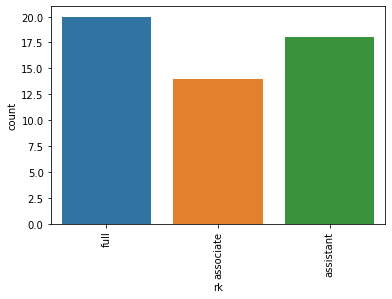

In [ ]:
sns.countplot(x = 'rk', data = salaries_discrimination)
plt.xticks(rotation = 90)
plt.show()

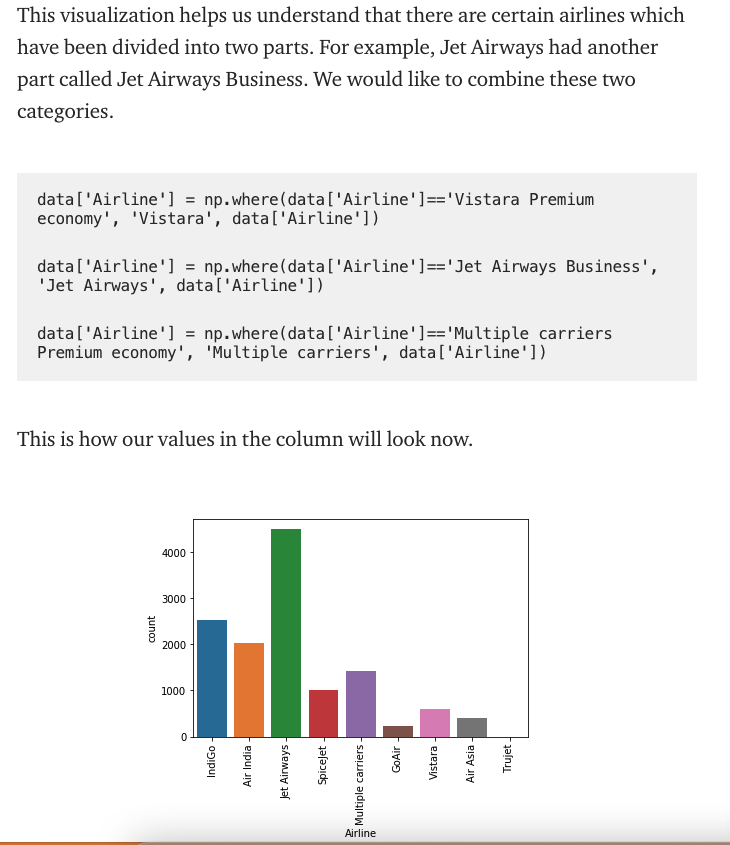

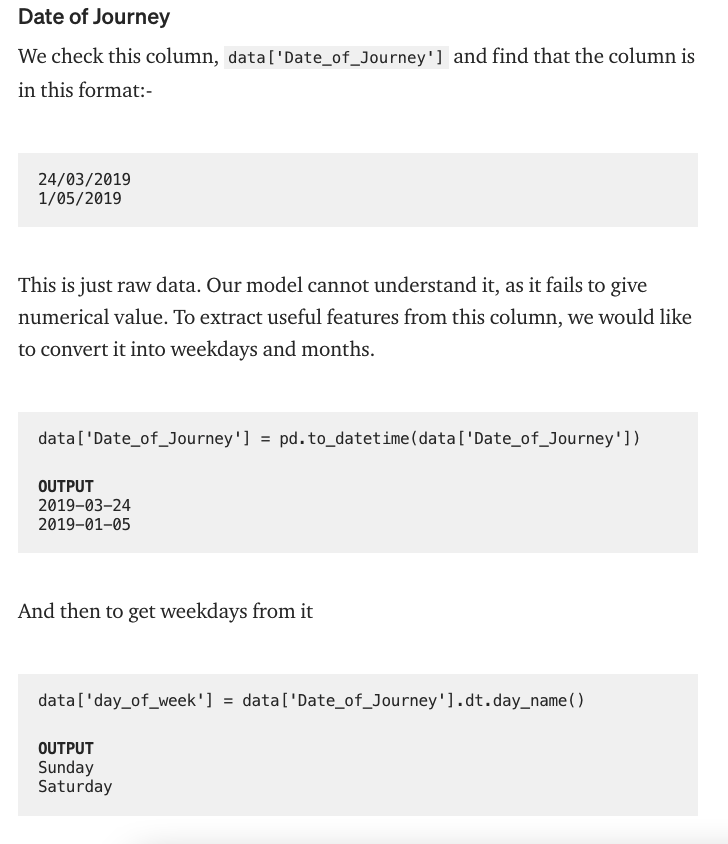

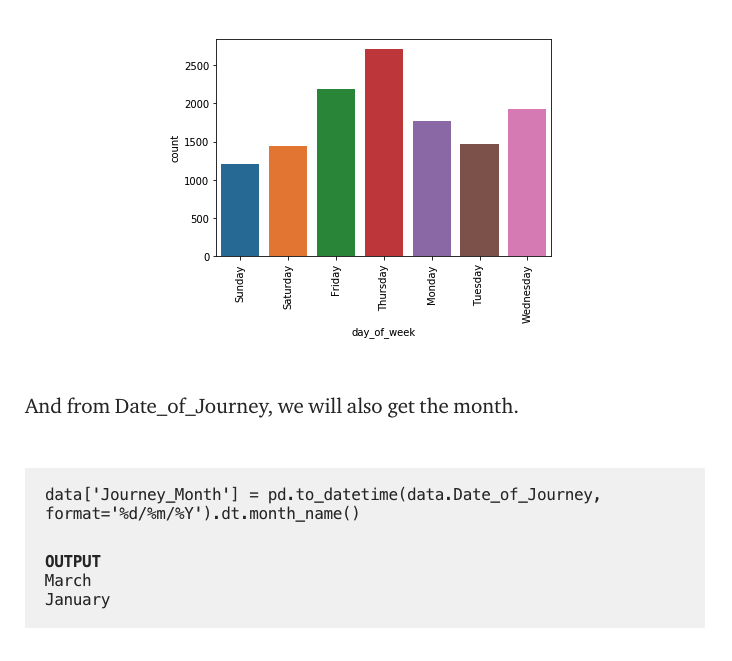

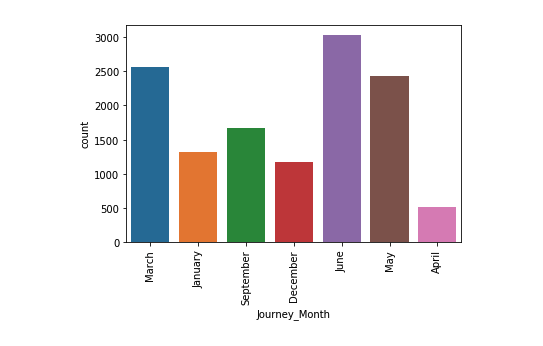

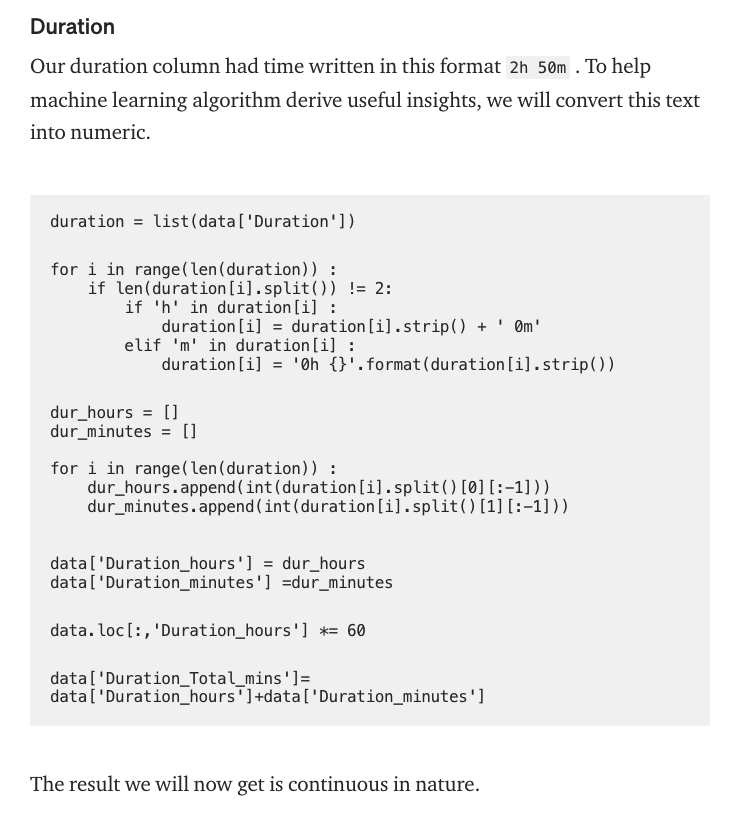

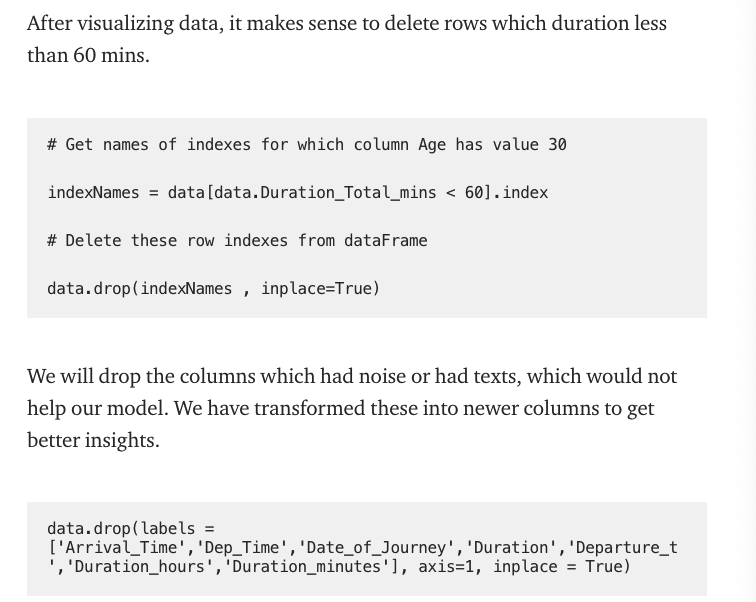

In [ ]:
# Vamos a transformar todas las variables en dummies

dummies = pd.get_dummies(salaries_discrimination['rk'])
dummies.head(20)

,assistant,associate,full
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,0,1


# Como elegir un método de selección de variables para ML

La **selección de variables** es el proceso de reducir el número de variables de entrada al desarrollar un modelo predictivo. 

Los métodos de selección de variables basados en estadísticos implican evaluar la relacióon entre cada variable de entrada y la variable de destino usando estadísticos y seleccionando aquellas variables de entrada que tienen la relación más fuerte con la variable objetivo. La elección de estadísticos depende del tipo de datos de la variable de entrada y de salida.

**1. Metodos de selección de variables (FEATURE SELECTION)**

Los metodos de selección de variables estan destinados a reducir el número de variables de entrada a aquellas que se consideren más útiles para un modelo a fin de predecir la variable objetivo. 

 + Algunos problemas de modelado predictivo tienen una gran cantidad de variables que pueden relentizar el desarrollo y entrenamiento de modelos y requieren una gran cantidad de memoria del sistema. Además, el rendimiento de algunos modelos pueden degradarse cuando se incluyen variables de entrada que no son relevantes para la variable objetivo.
   + ' Muchos modelos especialmente aquellos basados en pendientes de regressión, estimarán parámetros para cada término del modelo. Debido a esto, la presencia de variables no informativas puede agregar incertidumber a las predicciones y reducir la efectividad del modelo.'

+ Una forma de pensar en métodos de selección de variables es en términos de métodos **supervisados y no supervisados**:

   + La principal **diferencia** se encuentra en si las variables se seleccionan en función de la variable objetivo. Las técnicas de selección de variables **no spuervisadas** ignoran la variable objetivo, como los métodos que eliminan las variables redundantes mediante la correlación. Las técnicas de selección de variables **supervisadas** usan la variable objetivo, como métodos que eliminan variables irrelevantes.

+ Otra manera de considerar el mecanismo usado para seleccionar variables se puede dividir en métodos de **envoltura (wrapped) y filtro (filter)**. Estos métodos están casi siempre supervisados y se evalúan en función del rendimiento de un modelo resultante en un conjunto de datos reservado.
  + Los metodos de seleccion de variables **wrapped** crean muchos modelos con diferentes subconjuntos de variables de entrada y seleccionan aquellas variables que dan como resultado el modelo con mejor rendimiento según una métrica de rendimiento (agregan o eliminan predictores para encontrar la combinación óptima que maximiza el rendimiento del modelo).

  + Los métodos de selección de variables **filter** usan técnicas estadísticas para evaluar la relación entre cada variable de entrada y la variable objetivo, y estas puntuaciones se usan como base para elegir (filtrar) las variables de entradas que se usaran en el modelo (evaluan la relevancia de los predictores fuera del modelo predictivo y luego modelan solo con los predictores que pasan algún control)

+ Hay algunos algoritmos de ML que realizan la selección de variables automáticamente como parte del aprendizaje del modelo. Podriamos referirnos a estas técnicas como **métodos de selección de variables intrínsecas**. Esto incluyee modelos de regressión como Lasso y árboles de decisión. 
  + Algunos modelos son resistentes a los predictores no informativos. Los modelos basados en árboles, MARS y el Lasso llevan INTRÍNSECAMENTE la seleccion de variables.

+ La selección de variables también está relacionada con las técnicas de reducción de dimensionalidad (PCA), ya que ambos métodos buscan menos variables de entrada para un modelo predictivo. La diferencia es que la selección de variables selecciona variables para mantenerlas o eliminarlas del conjunto de datos, mientras que la PCA crea una proyección de los datos que da como resultado variables de entrada completamente nuevas. 



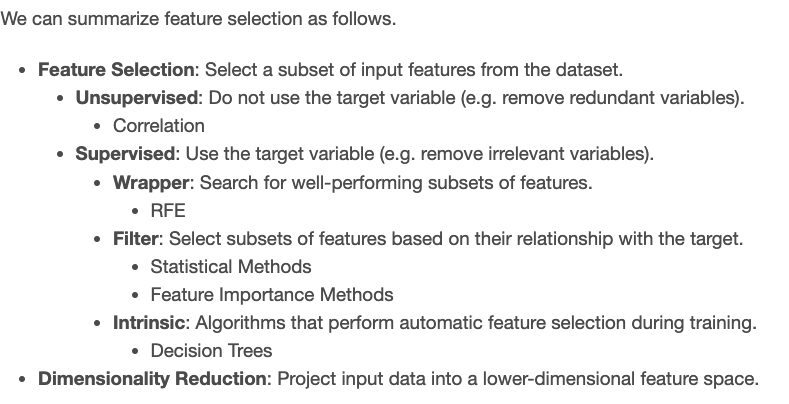

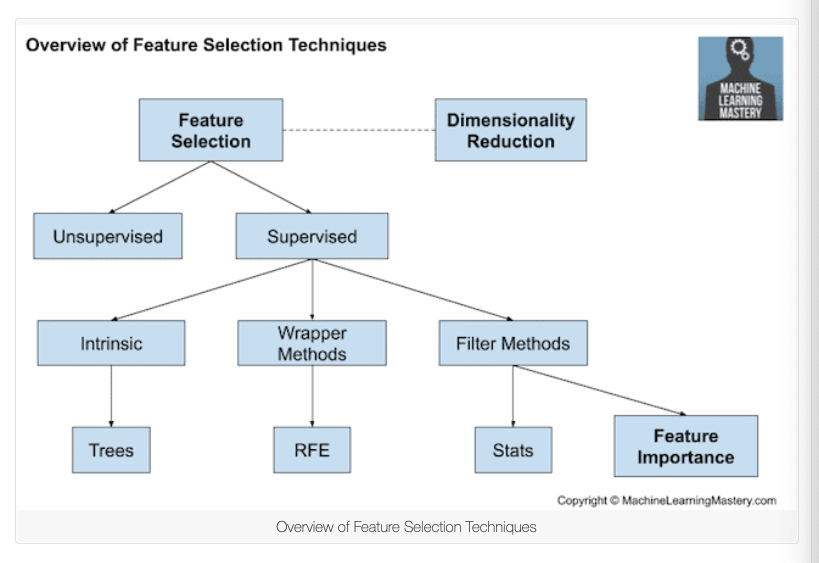

**2. Estadísticos para métodos de selección de variables basado en filtros**

Es común usar medidas estadísticas de tipo correlación entre las variables de entrada y salida como base para la selección de variables de filtro. La elección de estas medidas depende en gran medida de los tipos de datos que contengan las variables.

**Hay diferentes tipos de datos que pueden contener las variables:**

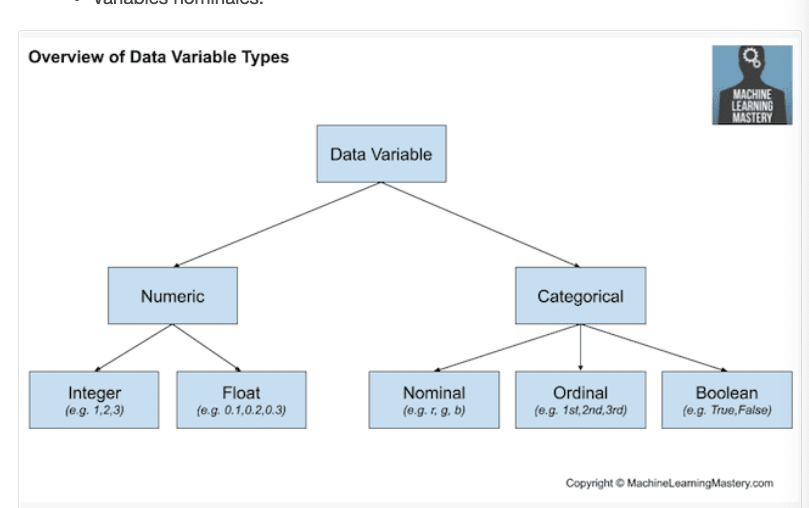

+ Cuanto más se sepa sobre el tipo de datos de una variable, más fácil será elegir una medida estadística adecuada para un método de selección de variables basado en filtros. Las **variables de entrada** son aquellas que se proporcionan como entrada a un modelo. En la selección de variables, es este grupo de variables el que deseamos reducir el tamaño. Las variables de salida son aquellas para las que un modelo pretende predecir, llamadas **variables respuesta**

+ El tipo de variable de respuesta indica el tipo de problema de modelado predictivo que se está realizando. Por ejemplo, una **variable de salida numérica** indica un problema de modelado predictivo de regressión y una **variable de salida categórica** indica un problema de modelado predictivo de clasificación.

+ Las medidas estadísticas usadas en la selección de variables basadas en filtros se calculan una variable de entrada a la vez con la variable de destino. (conocidas como medidas estadísticas univariante, se evalua cada predictor de forma aislada. La existencia de predictores correlacionados permite seleccionar predictores importantes, pero redundantes. La consecuencia es que si se eligen demasiados predictoreshay problemas de multicolinealidad). 

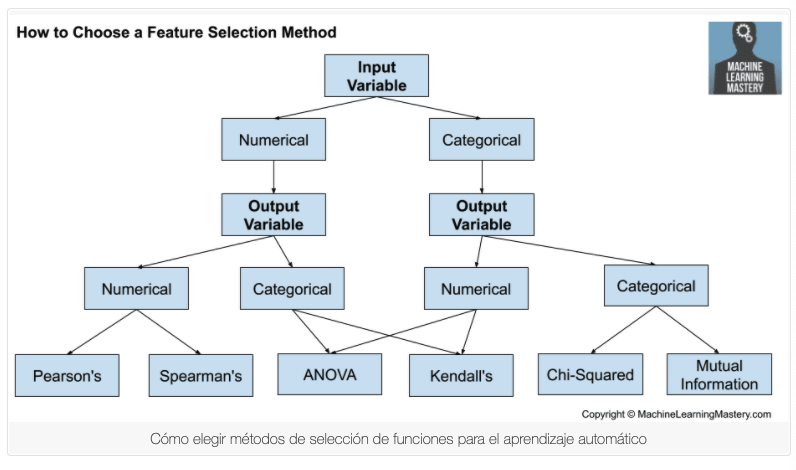

+ **Entrada numérica, Salida numérica**

  + Este es un problema de modelado predictivo de regresión con variables de entrada numéricas.

  + Las técnicas más comunes son usar un coeficiente de correlación, como el de Pearson para una correlación **lineal**, o métodos basados en rangos para una correlación **no lineal**

+ **Entrada numérica, Salida categórica**

  + Este es un problema de modelado predictivo de clasificación con variables de entrada numéricas. Este seria un problema común de clasificación.

  + Las técnicas más comunes están basadas en la correlación, donde se debe tener en cuenta el objetivo categórico. **Coeficiente de correlación ANOVA** (lneal) y **Coeficiente de rango Kendall** (no lineal).

+ **Entrada categórica, salida numérica**

  + Este es un problema de modelado predictivo de regresión con variables de entrada categóricas. Es un problema de regresión muy extraño.

+ **Entrada categórica, salida categórica**

  + Este es un problema de modelado predictivo de clasificación con variables de entrada categóricas.
  
  + Las medidas de correlación más común para datos categóricos es la **prueba de chi-cuadrado**. Tambien se puede utilizar la **información mútua**, campo de la teoría de la información.

**3. Consejos y trucos para la selección de variables**

  + **Estadísticos de correlación**
    + La bibloteca de Scikit-learn proporciona una implementación de la mayoría de las medidas estadísticas útiles 

    Coeficiente de correlación de Pearson: f_regression()
    ANOVA: f_clasif()
    Chi - Cuadrado: chi2()
    Información mutua: mutual_info_classif() y mutual_info_regression()

  + **Metodos de selección**
    + La bibloteca de scikkit-learn proporciona muchos métodos de filtrado diferentes una vez que se han calculado los estadísticos para cada variable de entrada como objetivo.

    Seleccionar los variables k más importantes (SelectKBest)
    Seleccionar las variables percentiles superiores (SelectPercentile)

  + **Transformar variables**
    + Considere transformar las variables para acceder a diferentes métodos estadísticos.

    + Puedes transformar una variable categórica a ordinal o una variable numérica a discreta. Algunos métodos estadísticos asumen propiedades de las variables como la P de Pearson que asume una ditribución de probabilidad gaussiana apra las observaciones y una relación lineal. Puedes transformar los datos para cumplir con las expectativas de la prueba y probar la prueba independientemente de las expectativas y comparar los resultados.

## **Ejemplos resueltos de selección de variables**

### **Selección de variables de regressión**

+ Variables de entrada y salida numéricas. Preparamos un problema de regressión de prueba usando la funcion **make_regression()**. La seleccion de variables se realiza mediante el coeficiente de Pearson a través de la funcion **f_regression()**.

In [20]:
# Seleccion de variables con la correlación de pearson para variables numericas

from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Generamos el dataset
X, y = make_regression(n_samples = 100, n_features = 100, n_informative = 10)

# definimos seleccion de variables
feature_selection = SelectKBest(score_func=f_regression, k = 10)

# Aplicamos seleccion de variables
X_selected = feature_selection.fit_transform(X,y)
print(X_selected.shape)

(100, 10)

(100, 10)


El ejemplo primero crea el conjunto de datos de regressión. Luego define la seleccion de las variables y aplica el procedimiento de selección de variables al conjunto de datos, devolviendo un subconjunto de las variables de entrada seleccionadas.

### **Selección de variables de clasificación**

+ Variables de entrada numérica y salida categórica. Se prepara un problema de regresión usando la función **make_classification()**. La selección de variables se realiza usando la medida **ANOVA F** a través de la función **f_classif()**

In [21]:
# método de clasificación de variables ANOVA entrada numerica y salida categorica
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


In [24]:
# Generamos dataset
X,y = make_classification(n_samples= 100, n_features = 20, n_informative=2)

# Definimos variables de seleccion

feature_selection = SelectKBest(score_func=f_classif, k = 2)

# Aplicamos variables de seleccion
X_selected = feature_selection.fit_transform(X,y)
print(X_selected.shape)

(100, 2)


Ejecutar el ejemplo primero crea el conjunto de datos de clasificación, luego define la selección de características y aplica el procedimiento de selección de características al conjunto de datos, devolviendo un subconjunto de las características de entrada seleccionadas.